In [153]:
aa = np.array([0,1,0,2])

In [157]:
(np.diff(aa) > 0).all()

False

# importo file training

In [135]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [136]:
plt.rcParams['figure.figsize'] = (16, 8)

In [144]:
import numpy as np
run = 10
import os
try: os.mkdir(f"../plots/wgangp_{run}")
except:
    print("")
a = np.loadtxt(f'runs/{run}/training.dat')
print('a loaded')
ncritic=30


#a = a[:10000*ncritic]
#b = np.loadtxt(f'runs/{6}/training.dat')
#b[:,0] = b[:,0] + a[-1,0] + 1
#print('b loaded')
#b = b[:2500*ncritic]
#c = np.loadtxt(f'runs/{7}/training.dat')
#c[:,0] = c[:,0] + b[-1,0] + 1
#print('c loaded')
#c = c[:1750*ncritic]
#a = np.r_[a,b,c]



print(len(a)/ncritic)
before_gen_it = np.arange(0,a.shape[0],ncritic) - 1
before_gen_it[0] = 0
aa = smooth(-a[before_gen_it,2],71)
aa[:10] = -a[before_gen_it,2][:10]
# 0 gen_iter
# 1 critic_iter
# 2 d_loss_tot
# 3 d_loss_true
# 4 d_loss_fake
# 5 d_loss_gp
# 6 d_loss_tot_test
# 7 d_loss_true_test
# 8 d_loss_fake_test
# 9 d_loss_gp_test
# 10 g_loss


a loaded
10000.0


# plotto d_loss_true, d_loss_fake, d_loss_gp*10

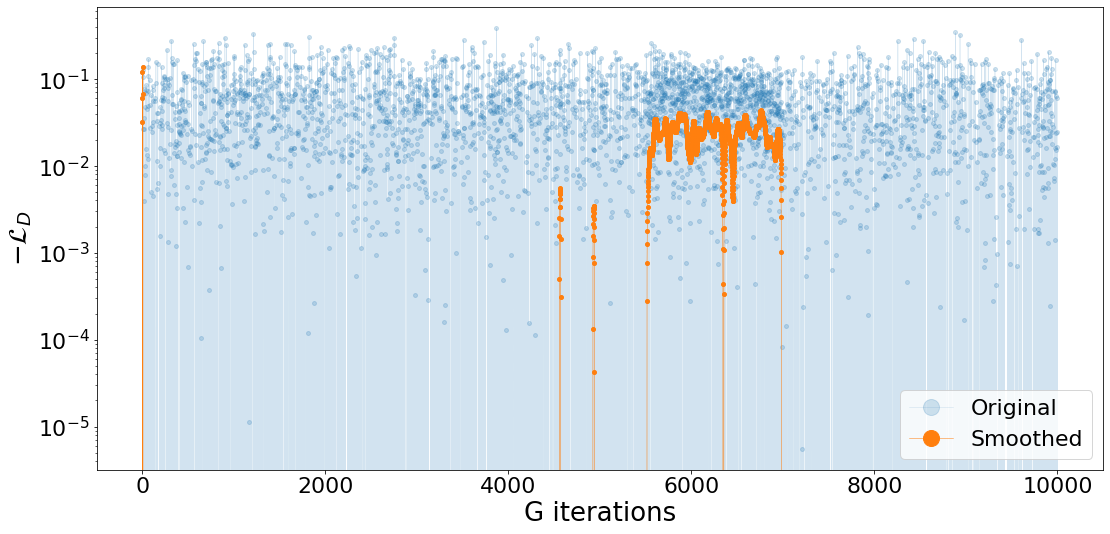

In [147]:
#every = ncritic
plt.plot(a[before_gen_it,0], -a[before_gen_it,2], label='Original', alpha=0.2)
#plt.plot(a[before_gen_it,0], [0.]*len(before_gen_it),lw=2,ms=0., label='Zero')
#plt.plot(a[before_gen_it,0], [-0.2]*len(before_gen_it),lw=2,ms=0.)
plt.plot(a[before_gen_it,0], aa, label='Smoothed')
#plt.ylim([1e-3,6.6])
#plt.ylim([0,6])
plt.xlabel("G iterations")
plt.ylabel('$- \\mathcal{L}_D$')
#plt.xscale('log')

#plt.yscale('log')
plt.legend()
plt.tight_layout()
#plt.savefig(f"../plots/wgangp_{run}/training",fmt="png",dpi=60)
#plt.savefig(f"../lagr_gan_training",fmt="png",dpi=60)
plt.show()

In [81]:
trajs = np.load('../gen_trajs_run51.npy')

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


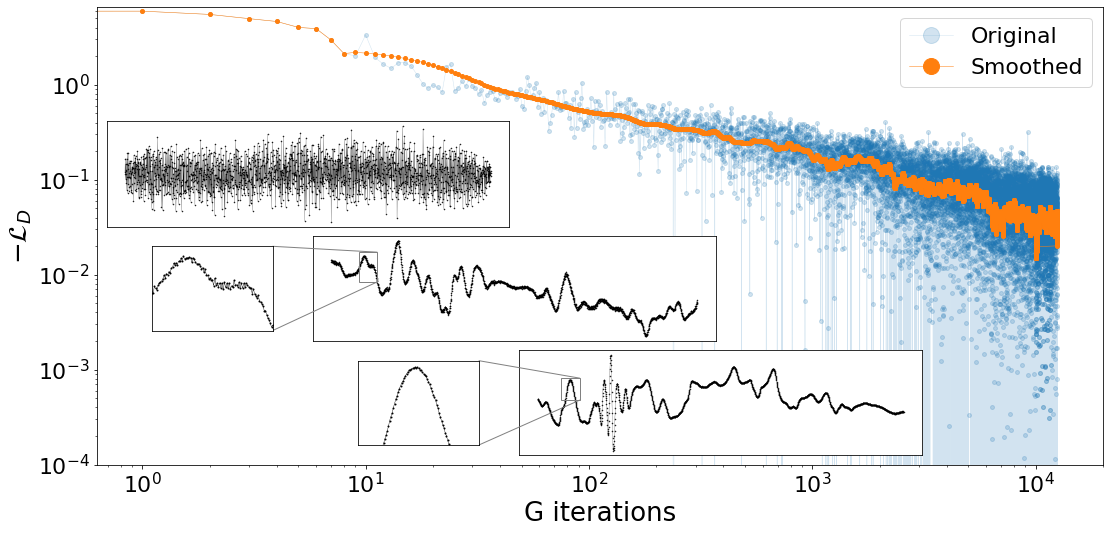

In [102]:
op = {'lw':0.2, 'ms':1, 'color':'black'}
op2 = {'lw':0.4, 'ms':2, 'color':'black'}

before_gen_it = np.arange(0,a.shape[0],ncritic) - 1
before_gen_it[0] = 0
#every = ncritic
fig, ax = plt.subplots()

ax.plot(a[before_gen_it,0], -a[before_gen_it,2], label='Original',alpha=0.2)
ax.plot(a[before_gen_it,0], aa, label='Smoothed')
ax.set_ylim([1e-4,6.6])

ax.set_xlabel("G iterations")
ax.set_ylabel('$- \\mathcal{L}_D$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
fig.tight_layout()

in1 = ax.inset_axes([0.01,0.52,0.4,0.23])#.axis('off')
in2 = ax.inset_axes([0.215,0.27,0.4,0.23])#.axis('off')
in3 = ax.inset_axes([0.42,0.02,0.4,0.23])#.axis('off')

in22 = in2.inset_axes([-0.4,0.1,0.3,0.8])
in33 = in3.inset_axes([-0.4,0.1,0.3,0.8])

in22.plot(trajs[1], **op2)
in22.set_xlim([150,250])
in22.set_ylim([0,2.5])

in33.plot(trajs[2], **op2)
in33.set_xlim([130,230])
in33.set_ylim([0.1,2.6])

in1.plot(trajs[0], **op)
in2.plot(trajs[1], **op)
in3.plot(trajs[2], **op)

in1.set_xticks([])
in2.set_xticks([])
in3.set_xticks([])
in1.set_yticks([])
in2.set_yticks([])
in3.set_yticks([])

in22.set_xticks([])
in22.set_yticks([])
in33.set_xticks([])
in33.set_yticks([])

in2.indicate_inset_zoom(in22,alpha=4)
in3.indicate_inset_zoom(in33,alpha=4)

#fig.savefig(f"../plots/wgangp_{run}/training",fmt="png",dpi=60)
fig.savefig(f"../lagr_gan_training_trajs",fmt="png",dpi=60)
fig.show()

(0, 2.5)

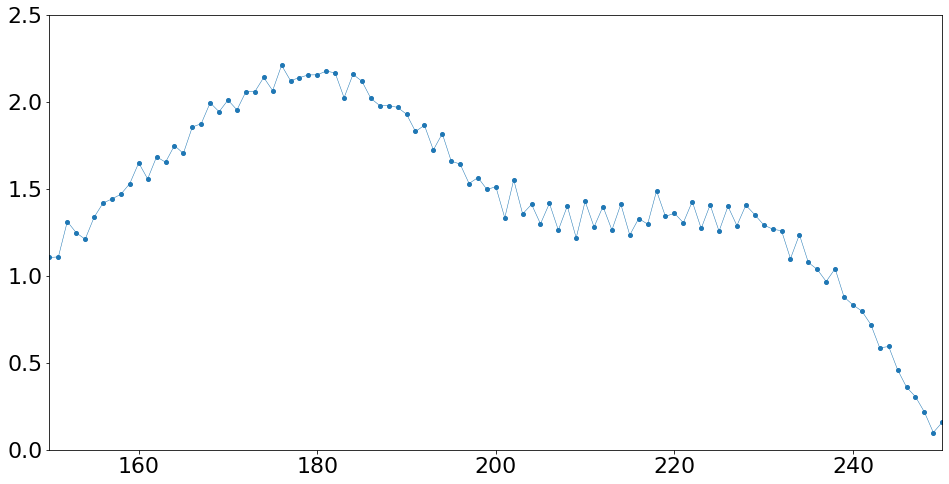

In [83]:
plt.plot(trajs[1])
plt.xlim([150,250])
plt.ylim([0,2.5])

(0, 2.5)

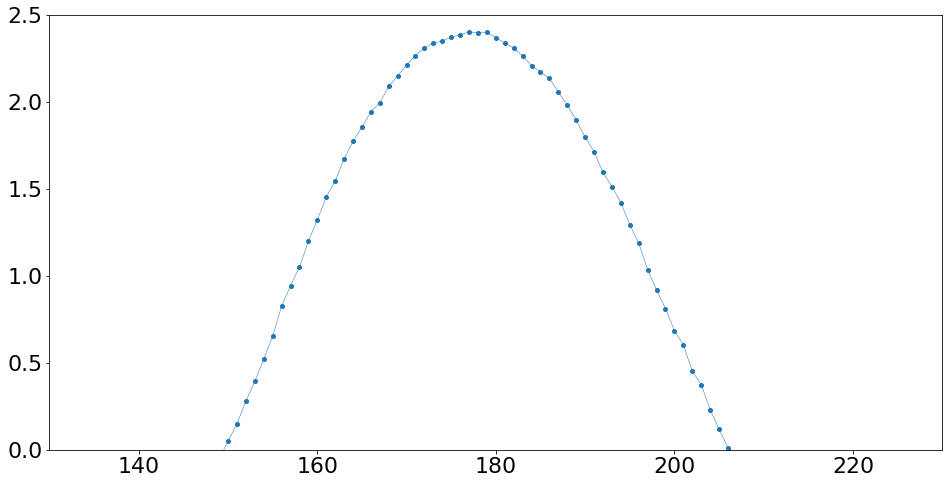

In [100]:
aaa = 0
plt.plot(trajs[2])
plt.xlim([130,230])
plt.ylim([0,2.5])

# plotto d_loss tra una iterazione del generatore e l'altra

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


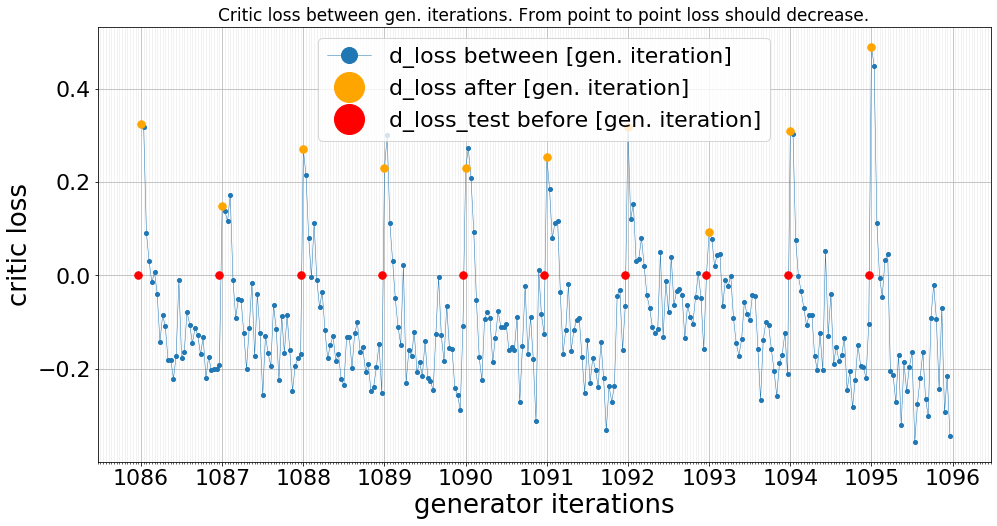

In [48]:
if run <= 31:
    from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    nn = 10
    every = ncritic 
    start_gen_iter = int(len(a)/ncritic) - nn*2
    start = (start_gen_iter)*every
    # number of gen_iter to show
    end = (start_gen_iter+nn)*every
    
    ax.plot(np.arange(start//every,end//every,1./every), a[start:end,2], label='d_loss between [gen. iteration]')
    ax.plot(a[start:end:every,0], a[start:end:every,2], lw=0, color='orange', markersize=15, label='d_loss after [gen. iteration]')
    ax.plot(a[start:end:every,0]-1./every, a[start:end:every,6], lw=0, markersize=15, color='red', label='d_loss_test before [gen. iteration]')
    ax.legend()
    ax.set_xlabel('generator iterations')
    ax.set_ylabel('critic loss')
    ax.set_title('Critic loss between gen. iterations. From point to point loss should decrease.',fontsize=17)
    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(1/(ncritic)))
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    
    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.9)
    
    fig.savefig(f'../plots/training_run_{run}',dpi=100,fmt='png')
    fig.show()
elif run > 31:
    from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    nn = 10
    every = ncritic
    start_gen_iter = int(len(a)/ncritic) - nn*2
    start = (start_gen_iter)*every
    # number of gen_iter to show
    end = (start_gen_iter+nn)*every
    
    ax.plot(a[start:end,0]+(a[start:end,1]%ncritic)/ncritic, a[start:end,2], label='d_loss between [gen. iteration]')
    ax.plot(a[start:end:every,0], a[start:end:every,2], lw=0, color='orange', markersize=20, label='d_loss after [gen. iteration]')
    # ax.plot(a[start:end:every,0]-1./every, a[start:end:every,6], lw=0, markersize=15, color='red', label='d_loss_test before [gen. iteration]')
    ax.legend()
    ax.set_xlabel('generator iterations')
    ax.set_ylabel('critic loss')
    ax.set_title('Critic loss between gen. iterations. From point to point loss should decrease.',fontsize=17)
    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(1/(ncritic)))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    
    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.9)
    
    fig.savefig(f'../plots/training_run_{run}',dpi=100,fmt='png')
    fig.show()


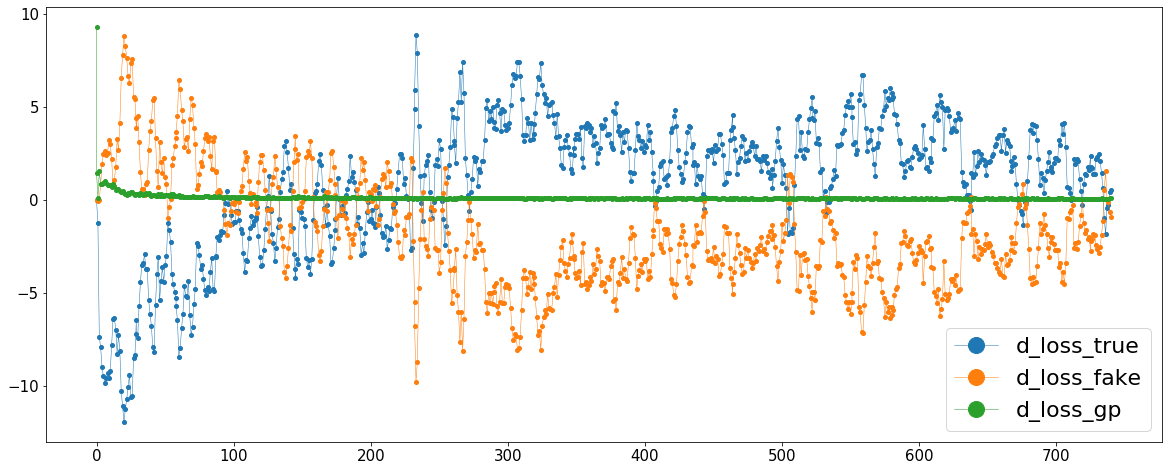

In [110]:
every = ncritic*1 - 1
ms = 2
plt.plot(a[0:a.shape[0]:every,0], a[0:a.shape[0]:every,3], label='d_loss_true')
plt.plot(a[0:a.shape[0]:every,0], a[0:a.shape[0]:every,4], label='d_loss_fake')
plt.plot(a[0:a.shape[0]:every,0], 10*a[0:a.shape[0]:every,5], label='d_loss_gp')
#plt.ylim([-2,2])
plt.legend()
plt.show()

# plotto d_loss_training - d_loss_test

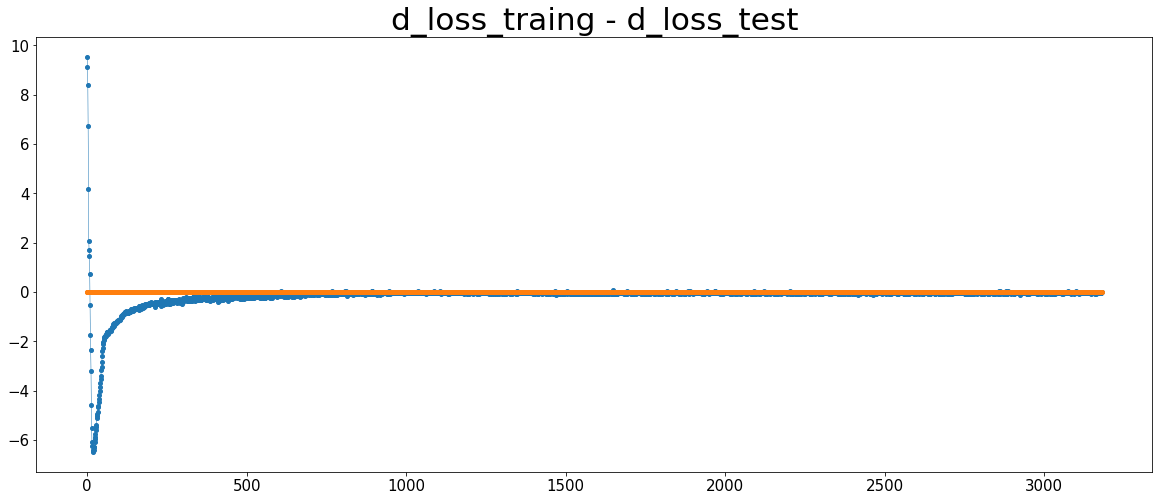

In [93]:
every = ncritic*1
ms = 2
#plt.scatter(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),1], label='d_loss', s=ms)
#plt.scatter(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),5], label='d_loss_test', s=ms)
plt.title("d_loss_traing - d_loss_test")
plt.plot(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),2]-a[np.arange(0,a.shape[0],every),6], label='difference')
plt.plot(a[np.arange(0,a.shape[0],every),0], [0.]*len(a[np.arange(0,a.shape[0],every),1]))
#plt.ylim([-2,2])
plt.show()

In [60]:

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    #if x.ndim != 1:
    #    raise ValueError, "smooth only accepts 1 dimension arrays."
#
    #if x.size < window_len:
    #    raise ValueError, "Input vector needs to be bigger than window size."
#
#
    #if window_len<3:
    #    return x
#
#
    #if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
    #    raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[(window_len//2):-(window_len//2)]


In [253]:
aa = smooth(a[np.arange(0,a.shape[0],every),2],101)

(550,)

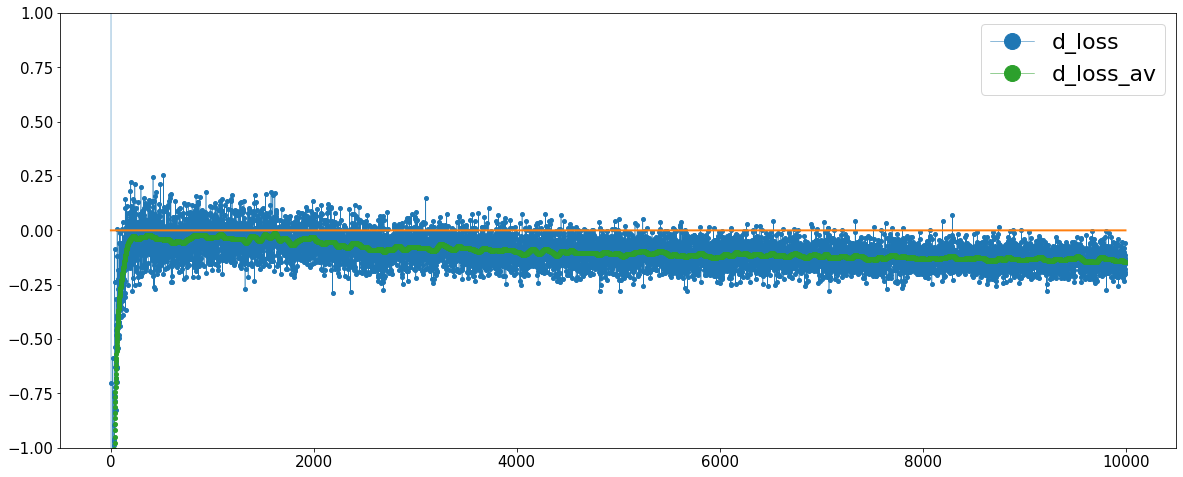

In [348]:
every = ncritic
plt.plot(a[np.arange(0,a.shape[0],every),0], a[np.arange(0,a.shape[0],every),1], label='d_loss')
plt.plot(a[np.arange(0,a.shape[0],every),0], [0.]*len(a[np.arange(0,a.shape[0],every),1]),lw=2,ms=0.)
aa = smooth(a[np.arange(0,a.shape[0],every),1],101)
plt.plot(a[np.arange(0,a.shape[0],every),0], aa, label='d_loss_av')
plt.ylim([-1,1])
plt.legend()
plt.show()